In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-16.172754272975325 -99.23560384379728
47.67497165465741 -75.42613285170017
-26.264002305573314 -2.5017430328475996
-73.50044802438633 19.80028093975193
8.613891301382225 94.92470334076455
-38.922286013412304 -171.24326077248955
1.0324681997310137 12.557753965866937
-69.16714628583567 -154.84699509890632
9.432199564008414 -137.05152182324358
39.31990624811763 -21.757668786743125
5.500990425579829 -57.144243486772126
-10.72941524262859 -41.605324807352275
83.68604898375972 -108.63578513388516
11.294358104411799 -129.08063739599362
2.0202463168891427 -93.96708993276141
9.397033964907578 50.273761529291846
88.3545095122158 6.54329363007983
-79.22409208549418 -79.12615960544605
-2.3331856528556614 156.15009145534918
45.630734740738006 108.90845673820837
21.57149295577959 -83.96504841964824
-50.59005189427709 -30.636758278671664
24.033855623236917 119.25276252106198
26.728119095681222 21.586264120278628
82.50367059264525 151.85258003212942
65.11088324001412 16.8709951836814
70.9364051276560

49.24219601480479 67.14580460833562
-1.3450040583842053 -146.3872424569102
-8.013875345475938 72.23283097222162
60.617514835906604 -136.7314488498688
64.03277141700491 149.7735703052836
-30.579421740997233 -109.91640177980372
78.46099190036267 -164.22070195763683
33.870171021267694 174.93076052559644
-11.990806893385823 -173.5573990672617
56.33043241369123 -109.86578750064854
-86.4372375679035 -58.19098527522529
17.77112058061772 165.74771871459382
14.764390683459439 -17.280738729302755
44.873961790370885 52.656887771540596
89.53420265817007 75.55096250319622
-83.63539755410538 8.48894820617383
29.142529153054085 -99.2689490017063
-72.53125567004486 -106.95017830599143
-24.624671402059292 -43.786335586938634
27.204577020738498 -133.1782997472091
8.380317673186354 -81.31658275165
50.567181587330964 -93.96857276490648
-61.24509086339532 -89.44568944963306
-29.468772110433036 121.09530835386573
80.00441779498266 166.68213209744732
-17.205928511863846 78.35460479985824
73.72631142150485 -1

-82.18532856399985 81.91422340261022
-22.45000918524906 -31.640587490631304
35.62945812906386 3.781121403451124
-2.6517330092076747 113.36527572828078
29.32690927600838 18.188790768328857
57.73988126044563 121.78050218041693
-77.50086002169117 146.72066029587603
8.733734445704485 119.65915682267422
60.08370055412669 147.61655063674363
0.5783843973219973 145.31901324504452
-49.69210016092583 -174.3075322329394
73.71524823946524 -121.25780956262187
55.24153693720112 166.94476724837676
88.4197526376829 67.3919211259279
62.785979945771885 -72.04399195782946
-89.87041684610578 -104.85405457393536
-45.425231623679885 -81.53071905224985
-46.652588526162376 -61.1661724378434
28.778649853582507 -170.22954046540005
2.032356868078665 -18.64244592730634
84.654366646807 -40.81442059521217
-33.57156158147339 -115.2749099469969
33.43850041660309 -150.97288091828455
10.416565405291422 -158.60518916454544
-81.29031648016174 13.453551408505831
45.2752692282219 -85.76736238695976
26.537947095596863 -105.

In [11]:
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | ferme-neuve
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | sabang
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | makokou
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | skeldon
Processing Record 12 of Set 1 | irece
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | bandarbeyla
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kieta
Processing Record 19 of Set 1 | darhan
Processing Record 20 of Set 1 | guane
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of Set 1 | makung
City not

Processing Record 35 of Set 4 | qazvin
Processing Record 36 of Set 4 | opuwo
Processing Record 37 of Set 4 | sibu
Processing Record 38 of Set 4 | lata
Processing Record 39 of Set 4 | berlevag
Processing Record 40 of Set 4 | pitkyaranta
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | boundiali
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | nakasongola
Processing Record 45 of Set 4 | bambous virieux
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | raton
Processing Record 49 of Set 4 | barrow
Processing Record 50 of Set 4 | alofi
Processing Record 1 of Set 5 | mackenzie
Processing Record 2 of Set 5 | sungaipenuh
Processing Record 3 of Set 5 | antalaha
Processing Record 4 of Set 5 | micheweni
Processing Record 5 of Set 5 | roseburg
Processing Record 6 of Set 5 | salinopolis
Processing Record 7 of Set 5 | znamenskoye
Processing Record 8 of Set 5 | kathu
Processing Record 9 of S

Processing Record 26 of Set 8 | hamilton
Processing Record 27 of Set 8 | majene
Processing Record 28 of Set 8 | dong hoi
Processing Record 29 of Set 8 | berbera
Processing Record 30 of Set 8 | tiznit
Processing Record 31 of Set 8 | yelkhovka
Processing Record 32 of Set 8 | bengkulu
Processing Record 33 of Set 8 | faya
Processing Record 34 of Set 8 | arman
Processing Record 35 of Set 8 | varna
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 38 of Set 8 | dalbandin
Processing Record 39 of Set 8 | aklavik
Processing Record 40 of Set 8 | puerto madero
Processing Record 41 of Set 8 | stornoway
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | port blair
Processing Record 44 of Set 8 | naryan-mar
Processing Record 45 of Set 8 | dunedin
Processing Record 46 of Set 8 | paralimni
Processing Record 47 of Set 8 | dubti
Processing Record 48 of Set 8 | port hawkesbury
Processing Record 49 of Set 8 |

Processing Record 10 of Set 12 | wellington
Processing Record 11 of Set 12 | nanyang
Processing Record 12 of Set 12 | kegayli
City not found. Skipping...
Processing Record 13 of Set 12 | kudahuvadhoo
Processing Record 14 of Set 12 | igrim
Processing Record 15 of Set 12 | ossora
Processing Record 16 of Set 12 | muros
Processing Record 17 of Set 12 | broken hill
Processing Record 18 of Set 12 | rorvik
Processing Record 19 of Set 12 | broager
Processing Record 20 of Set 12 | vanimo
Processing Record 21 of Set 12 | taoudenni
Processing Record 22 of Set 12 | murdochville
Processing Record 23 of Set 12 | tawnat
City not found. Skipping...
Processing Record 24 of Set 12 | valle hermoso
Processing Record 25 of Set 12 | port augusta
Processing Record 26 of Set 12 | fort frances
Processing Record 27 of Set 12 | bac lieu
Processing Record 28 of Set 12 | coihaique
Processing Record 29 of Set 12 | sao manuel
Processing Record 30 of Set 12 | conakry
Processing Record 31 of Set 12 | linchuan
City not

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,83.05,63,40,9.22,US,2022-07-01 21:33:18
1,Port Alfred,-33.5906,26.8910,67.80,42,0,14.12,ZA,2022-07-01 21:37:59
2,Barrow,71.2906,-156.7887,46.42,71,0,11.50,US,2022-07-01 21:34:24
3,Qaanaaq,77.4840,-69.3632,42.71,68,66,4.45,GL,2022-07-01 21:38:00
4,Atuona,-9.8000,-139.0333,77.36,73,3,8.37,PF,2022-07-01 21:38:00
5,Punta Arenas,-53.1500,-70.9167,35.71,69,0,5.75,CL,2022-07-01 21:38:00
6,Ponta Do Sol,32.6667,-17.1000,71.01,80,11,3.38,PT,2022-07-01 21:38:01
7,Oeiras,-7.0253,-42.1311,83.64,51,73,13.91,BR,2022-07-01 21:38:01
8,Norden,53.6000,7.2000,61.97,81,2,9.82,DE,2022-07-01 21:38:01
9,Stokmarknes,68.5646,14.9108,69.76,77,0,5.75,NO,2022-07-01 21:38:02


In [12]:
# reorder columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-07-01 21:33:18,42.0970,-79.2353,83.05,63,40,9.22
1,Port Alfred,ZA,2022-07-01 21:37:59,-33.5906,26.8910,67.80,42,0,14.12
2,Barrow,US,2022-07-01 21:34:24,71.2906,-156.7887,46.42,71,0,11.50
3,Qaanaaq,GL,2022-07-01 21:38:00,77.4840,-69.3632,42.71,68,66,4.45
4,Atuona,PF,2022-07-01 21:38:00,-9.8000,-139.0333,77.36,73,3,8.37
5,Punta Arenas,CL,2022-07-01 21:38:00,-53.1500,-70.9167,35.71,69,0,5.75
6,Ponta Do Sol,PT,2022-07-01 21:38:01,32.6667,-17.1000,71.01,80,11,3.38
7,Oeiras,BR,2022-07-01 21:38:01,-7.0253,-42.1311,83.64,51,73,13.91
8,Norden,DE,2022-07-01 21:38:01,53.6000,7.2000,61.97,81,2,9.82
9,Stokmarknes,NO,2022-07-01 21:38:02,68.5646,14.9108,69.76,77,0,5.75


In [13]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

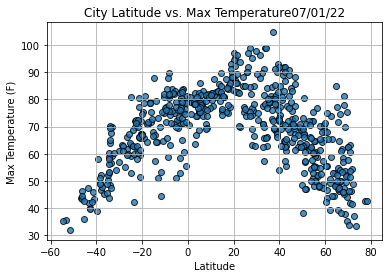

In [15]:
# Imoport time module

import time

# build the scatter plot for latitude vs. max tempterature

plt.scatter(lats, 
            max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha = 0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# show plot.

plt.show

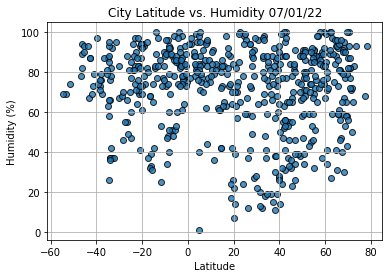

In [16]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

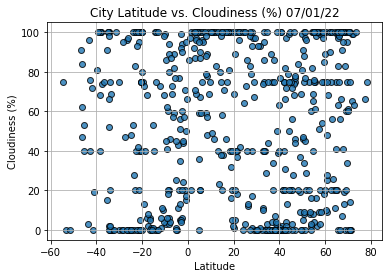

In [17]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

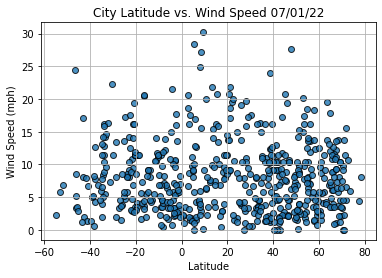

In [18]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [28]:
# Import linregress

from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
#and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    #Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation,
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

index13

City                      Kuching
Country                        MY
Date          2022-07-01 21:38:05
Lat                          1.55
Lng                      110.3333
Max Temp                    79.02
Humidity                       94
Cloudiness                     20
Wind Speed                   3.44
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
562    False
563     True
564     True
565    False
566     True
Name: Lat, Length: 567, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-07-01 21:33:18,42.0970,-79.2353,83.05,63,40,9.22
2,Barrow,US,2022-07-01 21:34:24,71.2906,-156.7887,46.42,71,0,11.50
3,Qaanaaq,GL,2022-07-01 21:38:00,77.4840,-69.3632,42.71,68,66,4.45
6,Ponta Do Sol,PT,2022-07-01 21:38:01,32.6667,-17.1000,71.01,80,11,3.38
8,Norden,DE,2022-07-01 21:38:01,53.6000,7.2000,61.97,81,2,9.82


In [25]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

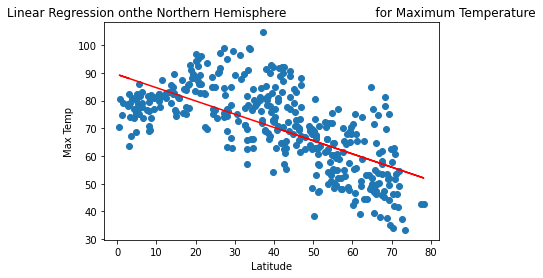

In [29]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values,  y_values,
                      'Linear Regression onthe Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (10,200))

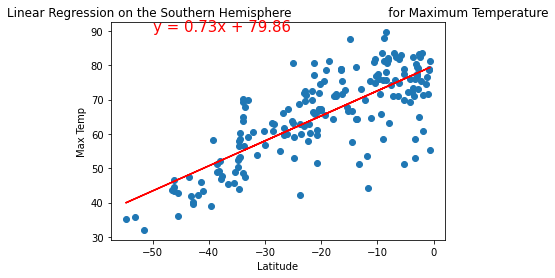

In [30]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

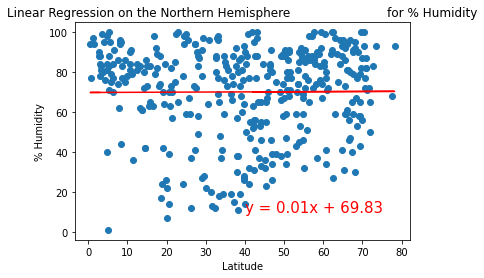

In [31]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

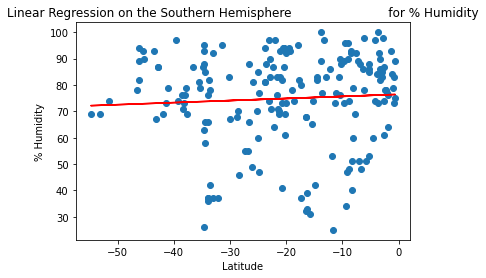

In [32]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

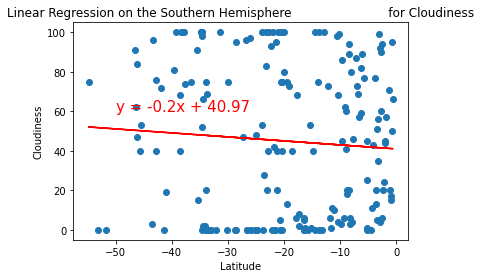

In [34]:
x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,60))

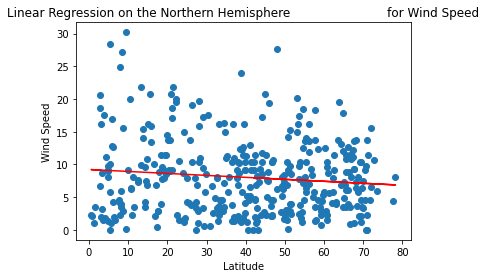

In [35]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

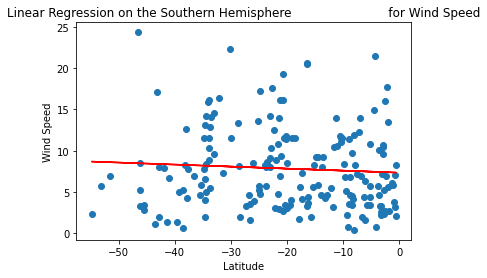

In [36]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))